La regresión lineal es un producto punto entre un vector columna $$X = [X_{1}\; X_{2}\; ... X_{p}]^{T}$$ y un vector de pesos $$W = [W_{1}\; W_{2}\; ... W_{p}]^{T}$$

Note que $p$ es el numero de variables.    
$N$ será el número de datos.
$$f(x) = X^{T}W + \beta_{0}$$

Queremos minimizar la suma de residuos cuadrados en la regresión lineal, básicamente computamos f(x) para cada x.   
(revisar la definición de derivada del RSS y autoconvencerse de que funciona).


# Ejercicio de regresión lineal

Entrenaremos modelos de regresión lineal para un conjunto de datos sobre peces. Se desearía predecir el peso de un pez, a partir de algunas de sus medidas. Longitud vertical, diagonal, etc. Nuestra variable a predecir será el peso *Weight*.
Detalles sobre el conjunto de datos [Aquí](https://www.kaggle.com/datasets/aungpyaeap/fish-market).

En primer lugar importamos las librerías necesarias para el ejercicio:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #para gráficas
from sklearn.model_selection import train_test_split #para partir el conjunto de datos en Entrenamiento y Testeo
from sklearn.linear_model import LinearRegression #Algoritmo de regresión lineal

/home/dave/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Primero cargar el archivo Fish.csv enviado al correo electrónico. A continuación leer el conjunto de datos con la función read_csv de la librería Pandas. Y visualizar las primeras 10 líneas de éste.

In [49]:
#TODO Leer el conjunto de datos y darle el nombre df
data = pd.read_csv("./Fish.csv")
data.head()
#TODO Mostrar las primeras 10 líneas de

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Procedamos a graficar puntos con coordenadas x=Length1, y=Weight para observar si aparentan tener un comportamiento cercano al lineal.

Para más detalles sobre diagramas de dispersión ver [AQUÍ](https://www.w3schools.com/python/matplotlib_scatter.asp).

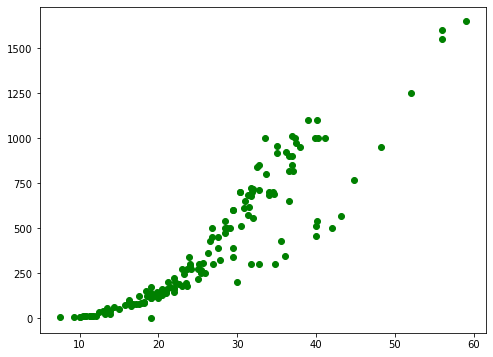

In [5]:
#Graficar diagrama de dispersión para Length1 vs Weight
plt.figure(figsize = [8, 6]) #Establecemos el tamaño de la figura

#Asignamos la variable x, y y el color para el diagrama de dispersión.
plt.scatter(data=data, x='Length1', y='Weight', color= "green") 

Usaremos el algoritmo para regresión lineal de SciKit Learn. Éste recibe arreglos de dos dimensiones (tablas). Pero aquí tenemos un vector para cada tributo. Queremos entonces una matriz de tamaño (lo que corresponda) x 1. Ése es el significado que tiene el valor -1 en arreglos de Numpy. 

In [6]:
X = np.array(data['Length1']).reshape(-1, 1)
y = np.array(data['Weight']).reshape(-1, 1)

Ahora usamos la función train_test_split para partir el conjunto de datos en dos subconjuntos: entrenamiento y testeo. Para ver ejemplos del uso de esta función ver [AQUÍ](https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/).

Usar sólo los parámetros x,y, test_size (Porcentaje de los datos correspondiente al conjunto de testeo). Se suelen usar proporciones al rededor de Entrenamiento 80% y Testeo 20%. Elegir una proporción similar, por ejemplo *test_size=0.25*.

In [13]:
#TODO Partir el conjunto de datos en Entrenamiento y Testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Ahora definamos el modelo de regresión lineal. Nuestro modelo se llamará *regr*. Lo entrenaremos y mediremos su coeficiente de detrminación. Para ver cómo es el código ver [AQUÍ](https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/)

In [36]:
# Modelo de regresión lineal de SciKit Learn
regr = LinearRegression()
regr.fit(X_train, y_train)
print("score = ", regr.score(X_test, y_test))

score =  0.8199146457834529


La salida anterior es el coeficiente de determinación del modelo arrojado por el algoritmo.

A continuación imprimimos la pendiente y el intercepto de la recta arrojada por el modelo.

In [18]:
print('slope:', regr.coef_) 
print('intercept:', regr.intercept_)

slope: [[32.17879872]]
intercept: [-454.56264203]


Ahora graficaremos el conjunto de testeo y la recta correspondiente al modelo en una misma gráfica.

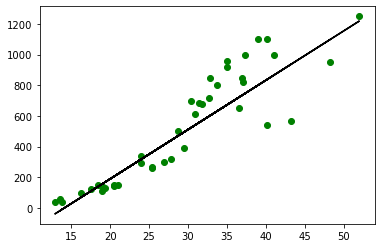

In [19]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='g')
plt.plot(X_test, y_pred, color ='k')
plt.show()

# Ejercicio
1. Bosquejar en la misma gráfica el diagrama de dispersión de (Lenght1,Weight) en color verde y el diagrama de dispersión para (Width, Weight) en color azul. Para esto sólo se requiere añadir al código dos líneas seguidas del tipo: plt.scatter(data=df, x=___, y=___, color= ___)

2. ¿Cuál modelo tendrá una pendiente mayor?

***Solución del 1***

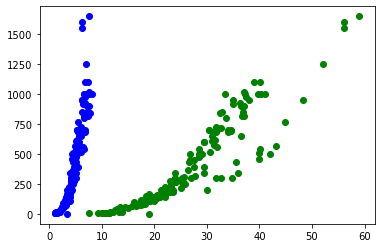

In [47]:
plt.scatter(data=data, x='Length1', y='Weight', color= "green") 
plt.scatter(data=data, x='Width', y= 'Weight', color ='b')
plt.show()

Según la gráfica los puntos azules tendrán una pendiente mayor

3. Entrenar un modelo de regresión lineal para la variable Width.
4. ¿Cuál tiene mayor Coeficiente de detrrminación? ¿por qué cree que esto ocurre?

***Solución del 3***

In [59]:
X = np.array(data['Length1']).reshape(-1, 1)
y = np.array(data['Weight']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [120]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print("score = ", regr.score(X_test, y_test))
print(f"slope = {regr.coef_}, intercept = {regr.intercept_}")

score =  0.8256714443848043
slope = [[32.02080545]], intercept = [-450.89862757]


Este modelo tiene mejor $R^{2}$ que el anterior, aparentemente es por que se ven menos dispersos los datos, en comparación con los del otro modelo.